In [1]:
import requests

url = "https://media.githubusercontent.com/media/jofa016/ACIT4620---Fuzzy-System/refs/heads/main/data/house1_clean_with_elprices.csv?token=A3DMZB5OJF4WETHTT7KGYT3JCXRHQ"
output_file = "house1_clean_with_elprices.csv"

# Stream download for large files
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(output_file, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print(f"Downloaded to {output_file}")

HTTPError: 404 Client Error: Not Found for url: https://media.githubusercontent.com/media/jofa016/ACIT4620---Fuzzy-System/refs/heads/main/data/house1_clean_with_elprices.csv?token=A3DMZB5OJF4WETHTT7KGYT3JCXRHQ

In [3]:
import pandas as pd, os
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("house1_clean_with_elprices.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Original notebook's selected appliances
selected = [
   "dishwasher","tv","kitchen_lights","htpc","kettle","toaster",
    "fridge","microwave","breadmaker","amp_livingroom",
    "livingroom_s_lamp","kitchen_dt_lamp","livingroom_s_lamp2",
    "iPad_charger","subwoofer_livingroom","livingroom_lamp_tv",
    "DAB_radio_livingroom","kitchen_lamp2","kitchen_phone&stereo",
    "coffee_machine","kitchen_radio","gas_oven"
]

# Keep only columns that exist in your CSV
selected = [col for col in selected if col in df.columns]

# Create a DataFrame with timestamp + selected appliances
df_appliances = df[['timestamp'] + selected].copy()

# Set timestamp as index
df_appliances.set_index('timestamp', inplace=True)

print("Appliances to process:", selected)
print(df_appliances)

Appliances to process: ['dishwasher', 'tv', 'kitchen_lights', 'htpc', 'kettle', 'toaster', 'fridge', 'microwave', 'breadmaker', 'amp_livingroom', 'livingroom_s_lamp', 'kitchen_dt_lamp', 'livingroom_s_lamp2', 'iPad_charger', 'subwoofer_livingroom', 'livingroom_lamp_tv', 'DAB_radio_livingroom', 'kitchen_lamp2', 'kitchen_phone&stereo', 'coffee_machine', 'kitchen_radio', 'gas_oven']
                     dishwasher       tv  kitchen_lights    htpc  kettle  \
timestamp                                                                  
2013-01-01 00:00:00         1.0   94.000             0.0  69.200     1.0   
2013-01-01 00:01:00         1.0  108.100             0.0  69.400     1.0   
2013-01-01 00:02:00         1.0  101.556             0.0  69.444     1.0   
2013-01-01 00:03:00         1.0   97.900             0.0  69.700     1.0   
2013-01-01 00:04:00         1.0   91.900             0.0  69.200     1.0   
...                         ...      ...             ...     ...     ...   
2013-12-31

In [5]:
year = 2013
start = pd.Timestamp(f"{year}-01-01")
end = pd.Timestamp(f"{year}-12-31 23:59:59")

df_year = df_appliances[(df_appliances.index >= start) & (df_appliances.index <= end)].copy()

merged_1min = df_year[selected].resample("1T").mean().fillna(0)

merged_1min['month'] = merged_1min.index.month
merged_1min['day'] = merged_1min.index.day
merged_1min['hour'] = merged_1min.index.hour

print("Merged 1-min shape:", merged_1min.shape)
merged_1min.head()

Merged 1-min shape: (525600, 25)


,dishwasher,tv,kitchen_lights,htpc,kettle,toaster,fridge,microwave,breadmaker,amp_livingroom,...,livingroom_lamp_tv,DAB_radio_livingroom,kitchen_lamp2,kitchen_phone&stereo,coffee_machine,kitchen_radio,gas_oven,month,day,hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1.0,94.000,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2013-01-01 00:01:00,1.0,108.100,0.0,69.400,1.0,0.0,88.600,1.0,0.0,23.100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2013-01-01 00:02:00,1.0,101.556,0.0,69.444,1.0,0.0,88.600,1.0,0.0,23.111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2013-01-01 00:03:00,1.0,97.900,0.0,69.700,1.0,0.0,88.889,1.0,0.0,23.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2013-01-01 00:04:00,1.0,91.900,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0


In [6]:
merged_1min = merged_1min.fillna(0)

merged_1min['month'] = merged_1min.index.month
merged_1min['day'] = merged_1min.index.day
merged_1min['hour'] = merged_1min.index.hour

print("Merged 1-min shape:", merged_1min.shape)
merged_1min

Merged 1-min shape: (525600, 25)


,dishwasher,tv,kitchen_lights,htpc,kettle,toaster,fridge,microwave,breadmaker,amp_livingroom,...,livingroom_lamp_tv,DAB_radio_livingroom,kitchen_lamp2,kitchen_phone&stereo,coffee_machine,kitchen_radio,gas_oven,month,day,hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1.0,94.000,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0
2013-01-01 00:01:00,1.0,108.100,0.0,69.400,1.0,0.0,88.600,1.0,0.0,23.100,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0
2013-01-01 00:02:00,1.0,101.556,0.0,69.444,1.0,0.0,88.600,1.0,0.0,23.111,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0
2013-01-01 00:03:00,1.0,97.900,0.0,69.700,1.0,0.0,88.889,1.0,0.0,23.000,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0
2013-01-01 00:04:00,1.0,91.900,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 23:55:00,1.0,1.000,0.0,64.667,1.0,1.0,0.000,1.0,0.0,23.444,...,13.0,0.0,18.000,1.0,0.889,1.0,3.0,12,31,23
2013-12-31 23:56:00,1.0,1.000,0.0,67.250,1.0,1.0,0.000,1.0,0.0,23.250,...,13.0,0.0,18.111,1.0,0.111,1.0,3.0,12,31,23
2013-12-31 23:57:00,1.0,1.000,0.0,64.625,1.0,1.0,0.000,1.0,0.0,23.000,...,13.0,0.0,18.000,1.0,0.375,1.0,3.0,12,31,23


In [7]:
el_prices_2024_path = "/Users/mithi/Downloads/spotpriser_2024.csv"

el_prices_2024 = pd.read_csv(el_prices_2024_path, sep=";")
el_prices_2024["timestamp_clean"] = (
    el_prices_2024["timestamp"]
    .str.replace("Kl. ", "", regex=False)
    .str.extract(r"(\d{4}-\d{2}-\d{2})\s+(\d{2})-\d{2}")  # extract date and starting hour
    .apply(lambda x: f"{x[0]} {x[1]}:00", axis=1)
)

# Convert to datetime
el_prices_2024["timestamp"] = pd.to_datetime(el_prices_2024["timestamp_clean"], format="%Y-%m-%d %H:%M")

el_prices_2024 = el_prices_2024.drop(columns=["timestamp_clean"])
el_prices_2024.set_index("timestamp", inplace=True)

el_prices_2024.head()

,NO1,NO2,NO3,NO4,NO5
timestamp,,,,,
2024-01-01 00:00:00,"0,75419","0,75419","0,41446","0,33157","0,77690"
2024-01-01 01:00:00,"0,68675","0,68675","0,39904","0,31923","0,74886"
2024-01-01 02:00:00,"0,38488","0,38488","0,37380","0,29904","0,72951"
2024-01-01 03:00:00,"0,34324","0,34324","0,34324","0,27459","0,71143"
2024-01-01 04:00:00,"0,33665","0,33665","0,33665","0,26932","0,69881"


In [8]:
# Adding month, day, and hour columns for merging
el_prices_2024['month'] = el_prices_2024.index.month
el_prices_2024['day'] = el_prices_2024.index.day
el_prices_2024['hour'] = el_prices_2024.index.hour

el_prices_2024.head()

,NO1,NO2,NO3,NO4,NO5,month,day,hour
timestamp,,,,,,,,
2024-01-01 00:00:00,"0,75419","0,75419","0,41446","0,33157","0,77690",1,1,0
2024-01-01 01:00:00,"0,68675","0,68675","0,39904","0,31923","0,74886",1,1,1
2024-01-01 02:00:00,"0,38488","0,38488","0,37380","0,29904","0,72951",1,1,2
2024-01-01 03:00:00,"0,34324","0,34324","0,34324","0,27459","0,71143",1,1,3
2024-01-01 04:00:00,"0,33665","0,33665","0,33665","0,26932","0,69881",1,1,4


In [9]:
spot_prices_clean = el_prices_2024[['NO1', 'hour', 'month', 'day']].rename(columns={'NO1': 'spot_price'})

spot_prices_clean['spot_price'] = (
    spot_prices_clean['spot_price']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

spot_prices_clean.head()

,spot_price,hour,month,day
timestamp,,,,
2024-01-01 00:00:00,0.75419,0,1,1
2024-01-01 01:00:00,0.68675,1,1,1
2024-01-01 02:00:00,0.38488,2,1,1
2024-01-01 03:00:00,0.34324,3,1,1
2024-01-01 04:00:00,0.33665,4,1,1


In [10]:
dupes = spot_prices_clean.duplicated(subset=['month', 'day', 'hour'], keep=False)

spot_prices_clean[dupes].sort_values(['month', 'day', 'hour'])

spot_prices_clean = spot_prices_clean.drop_duplicates(subset=['month', 'day', 'hour'], keep='first')

print("Shape after dropping duplicates:", spot_prices_clean.shape)
spot_prices_clean.head()

Shape after dropping duplicates: (8783, 4)


,spot_price,hour,month,day
timestamp,,,,
2024-01-01 00:00:00,0.75419,0,1,1
2024-01-01 01:00:00,0.68675,1,1,1
2024-01-01 02:00:00,0.38488,2,1,1
2024-01-01 03:00:00,0.34324,3,1,1
2024-01-01 04:00:00,0.33665,4,1,1


In [11]:
merged_full = merged_1min.merge(
    spot_prices_clean[['month', 'day', 'hour', 'spot_price']],
    on=['month', 'day', 'hour'],
    how='left'
)

merged_full.index = merged_1min.index

print("Merged full shape:", merged_full.shape)
merged_full


Merged full shape: (525600, 26)


,dishwasher,tv,kitchen_lights,htpc,kettle,toaster,fridge,microwave,breadmaker,amp_livingroom,...,DAB_radio_livingroom,kitchen_lamp2,kitchen_phone&stereo,coffee_machine,kitchen_radio,gas_oven,month,day,hour,spot_price
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1.0,94.000,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0,0.75419
2013-01-01 00:01:00,1.0,108.100,0.0,69.400,1.0,0.0,88.600,1.0,0.0,23.100,...,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0,0.75419
2013-01-01 00:02:00,1.0,101.556,0.0,69.444,1.0,0.0,88.600,1.0,0.0,23.111,...,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0,0.75419
2013-01-01 00:03:00,1.0,97.900,0.0,69.700,1.0,0.0,88.889,1.0,0.0,23.000,...,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0,0.75419
2013-01-01 00:04:00,1.0,91.900,0.0,69.200,1.0,0.0,88.800,1.0,0.0,23.200,...,0.0,0.000,0.0,0.000,0.0,0.0,1,1,0,0.75419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 23:55:00,1.0,1.000,0.0,64.667,1.0,1.0,0.000,1.0,0.0,23.444,...,0.0,18.000,1.0,0.889,1.0,3.0,12,31,23,0.32509
2013-12-31 23:56:00,1.0,1.000,0.0,67.250,1.0,1.0,0.000,1.0,0.0,23.250,...,0.0,18.111,1.0,0.111,1.0,3.0,12,31,23,0.32509
2013-12-31 23:57:00,1.0,1.000,0.0,64.625,1.0,1.0,0.000,1.0,0.0,23.000,...,0.0,18.000,1.0,0.375,1.0,3.0,12,31,23,0.32509


**Membership**

In [12]:
categories = {
    "kitchen_activity": ["breadmaker", "coffee_machine", "dishwasher", "fridge", "gas_oven",
                         "kettle", "kitchen_phone&stereo", "kitchen_radio", "microwave", "toaster"],
    "kitchen_lights": ["kitchen_lights", "kitchen_dt_lamp", "kitchen_lamp2"],
    "lounge_activity": ["amp_livingroom", "DAB_radio_livingroom", "htpc", "iPad_charger",
                        "subwoofer_livingroom", "tv"],
    "lounge_lights": ["livingroom_s_lamp", "livingroom_s_lamp2", "livingroom_lamp_tv"]
}

data = merged_full.copy()

# Aggregate appliances into categories
for cat_name, appliance_list in categories.items():
    valid_cols = [col for col in appliance_list if col in data.columns]
    data[cat_name] = data[valid_cols].sum(axis=1)

# Keep only columns relevant for fuzzy_main
columns_to_keep = ["kitchen_lights", "kitchen_activity", "lounge_activity",
                   "lounge_lights", "spot_price", "hour", "month", "day"]

data = data[columns_to_keep]

# Check result
print("Aggregated data shape:", data.shape)
data


Aggregated data shape: (525600, 8)


,kitchen_lights,kitchen_activity,lounge_activity,lounge_lights,spot_price,hour,month,day
timestamp,,,,,,,,
2013-01-01 00:00:00,0.000,91.800,186.400,0.000,0.75419,0,1,1
2013-01-01 00:01:00,0.000,91.600,200.600,0.000,0.75419,0,1,1
2013-01-01 00:02:00,0.000,91.600,194.111,0.000,0.75419,0,1,1
2013-01-01 00:03:00,0.000,91.889,190.600,0.000,0.75419,0,1,1
2013-01-01 00:04:00,0.000,91.800,184.300,0.000,0.75419,0,1,1
...,...,...,...,...,...,...,...,...
2013-12-31 23:55:00,18.000,9.889,106.444,37.111,0.32509,23,12,31
2013-12-31 23:56:00,18.111,9.111,108.958,37.375,0.32509,23,12,31
2013-12-31 23:57:00,18.000,9.375,106.482,37.125,0.32509,23,12,31


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
kitchen_lights,525600.0,24.465452,68.625295,0.0000,0.00000,0.11100,18.00000,537.14300
kitchen_activity,525600.0,89.101849,282.900222,0.0000,8.00000,9.44400,95.72200,5339.91100
lounge_activity,525600.0,31.032340,60.993055,0.0000,3.22200,3.50000,8.44400,581.58800
lounge_lights,525600.0,2.494083,7.134484,0.0000,0.00000,0.00000,0.00000,410.60000
spot_price,525540.0,0.608421,0.480198,-0.7073,0.33694,0.54625,0.80684,7.79699
hour,525600.0,11.500000,6.922193,0.0000,5.75000,11.50000,17.25000,23.00000
month,525600.0,6.526027,3.447855,1.0000,4.00000,7.00000,10.00000,12.00000
day,525600.0,15.720548,8.796255,1.0000,8.00000,16.00000,23.00000,31.00000


In [14]:
# fuzzy limits for light columns
lights_limits = {
    "off": (0, 0, 1.5),
    "low": (0.5, 5, 20),
    "medium": (15, 50, 150),
    "high": (120, 300, 550)
}

# fuzzy limits for activity columns
activity_limits = {
    "low": (0, 0, 20),
    "medium": (10, 100, 400),
    "high": (300, 1000, 5000)
}

# fuzzy limits for time of day
time_of_day = {
    "night": (0, 3, 6),
    "morning": (5, 8, 11),
    "afternoon": (10, 14, 18),
    "evening": (17, 20, 24)
}

# fuzzy limits for spot prices
electricity_prices = {
    "low": (0, 0.3, 0.6),
    "medium": (0.3, 0.8, 1.5),
    "high": (1.0, 2.5, 5.0)
}

In [15]:
def triangular_membership(x, a, b, c):
    """
    General triangle fuzzy membership function.

    :param x: array-like or scalar: Input value(s)
    :param a: float:                left base of triangle
    :param b: float:                peak of triangle
    :param c: float:                right base of triangle
    :param circular: bool:          optional: circular fuzzy set (default: False)
    :param period: float:           optional: cycle length of circular variables (default=24 for hours)
    :return: array-like or scalar:  triangle fuzzy membership
    """
    x = np.asarray(x, dtype=float)

    # initialize array with zeros in shape of x
    mu = np.zeros_like(x)

    # rising edge of triangle
    rising = (x > a) & (x <= b)
    mu[rising] = (x[rising] - a) / (b - a)

    # falling edge of triangle
    falling = (x > b) & (x < c)
    mu[falling] = (c - x[falling]) / (c - b)

    # everything else = 0
    return mu

In [16]:
import numpy as np
fuzzy_dict = {}

# lights
for col in ["kitchen_lights", "lounge_lights"]:
    for label, (a, b, c) in lights_limits.items():
        fuzzy_dict[f"{col}_{label}"] = triangular_membership(data[col], a, b, c)

# activity
for col in ["kitchen_activity", "lounge_activity"]:
    for label, (a, b, c) in activity_limits.items():
        fuzzy_dict[f"{col}_{label}"] = triangular_membership(data[col], a, b, c)

# time of day
for label, (a, b, c) in time_of_day.items():
    fuzzy_dict[f"time_{label}"] = triangular_membership(data["hour"], a, b, c)

# electricity
for label, (a, b, c) in electricity_prices.items():
    fuzzy_dict[f"spot_price_{label}"] = triangular_membership(data["spot_price"], a, b, c)

# create new fuzzified df
fuzzy_data = pd.DataFrame(fuzzy_dict, index=data.index)

# keep 'day', 'month', 'hour' columns for analysis
fuzzy_data[["day", "month", "hour"]] = data[["day", "month", "hour"]]

fuzzy_data.head()

,kitchen_lights_off,kitchen_lights_low,kitchen_lights_medium,kitchen_lights_high,lounge_lights_off,lounge_lights_low,lounge_lights_medium,lounge_lights_high,kitchen_activity_low,kitchen_activity_medium,...,time_night,time_morning,time_afternoon,time_evening,spot_price_low,spot_price_medium,spot_price_high,day,month,hour
timestamp,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908889,...,0.0,0.0,0.0,0.0,0.0,0.90838,0.0,1,1,0
2013-01-01 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906667,...,0.0,0.0,0.0,0.0,0.0,0.90838,0.0,1,1,0
2013-01-01 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906667,...,0.0,0.0,0.0,0.0,0.0,0.90838,0.0,1,1,0
2013-01-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909878,...,0.0,0.0,0.0,0.0,0.0,0.90838,0.0,1,1,0
2013-01-01 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.908889,...,0.0,0.0,0.0,0.0,0.0,0.90838,0.0,1,1,0


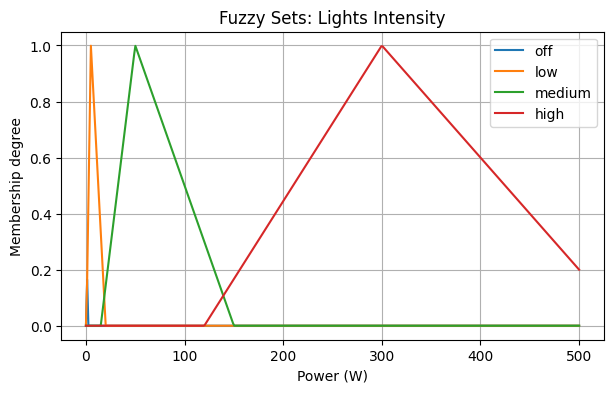

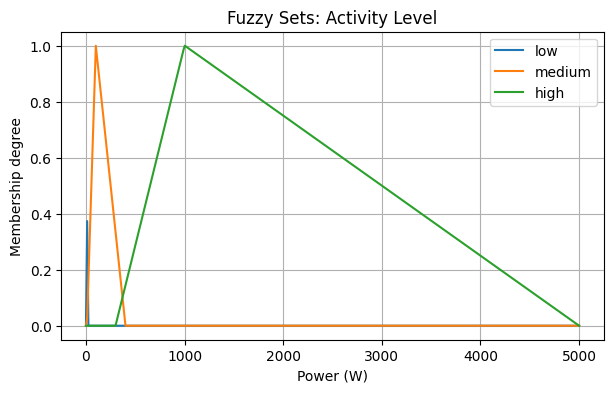

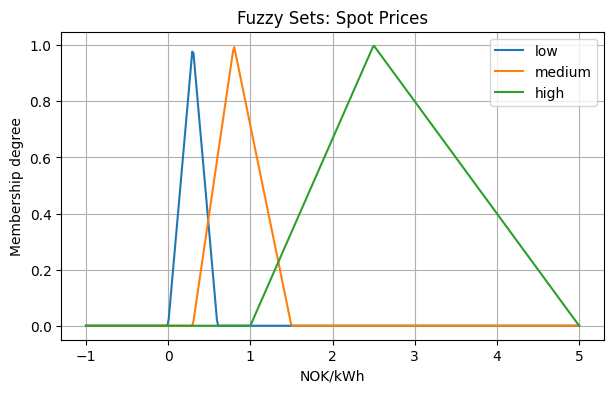

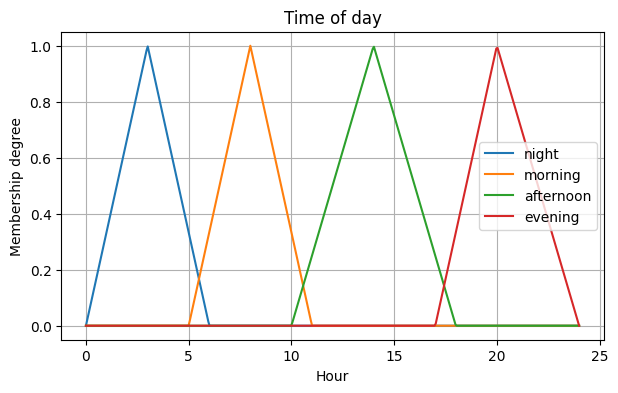

In [17]:
def plot_membership_set(x_range, limits_dict, title, xlabel):
    plt.figure(figsize=(7,4))
    x = np.linspace(*x_range, 400)
    for label, (a, b, c) in limits_dict.items():
        y = triangular_membership(x, a, b, c)
        plt.plot(x, y, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Membership degree")
    plt.legend()
    plt.grid(True)
    plt.show()

# lights
plot_membership_set((0, 500), lights_limits, "Fuzzy Sets: Lights Intensity", "Power (W)")
# activity
plot_membership_set((0, 5000), activity_limits, "Fuzzy Sets: Activity Level", "Power (W)")
# spot prices
plot_membership_set((-1, 5), electricity_prices, "Fuzzy Sets: Spot Prices", "NOK/kWh")
# time of day
plot_membership_set((0, 24), time_of_day, "Time of day", "Hour")

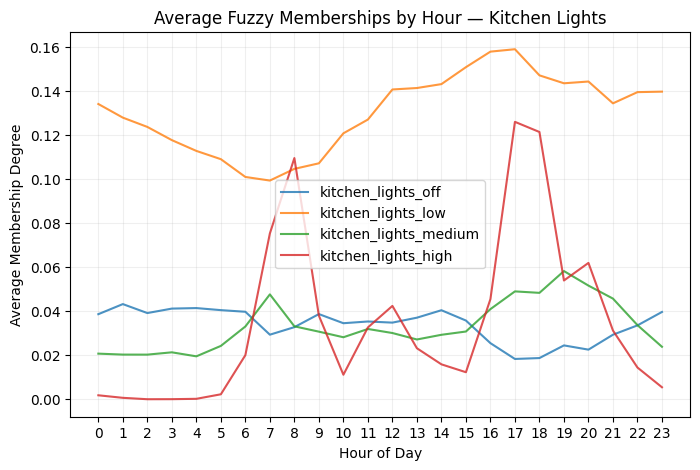

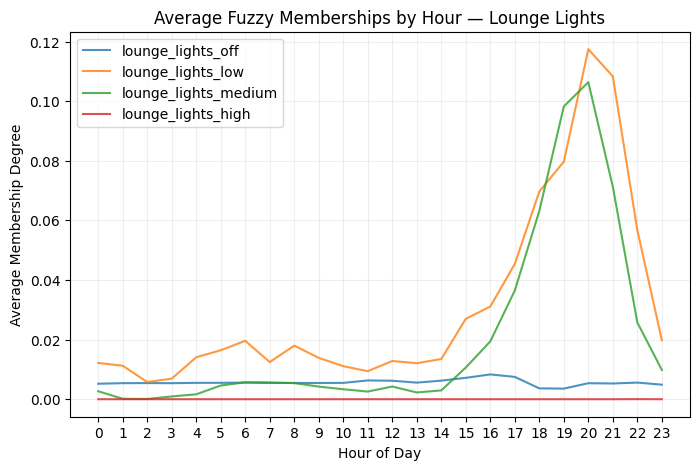

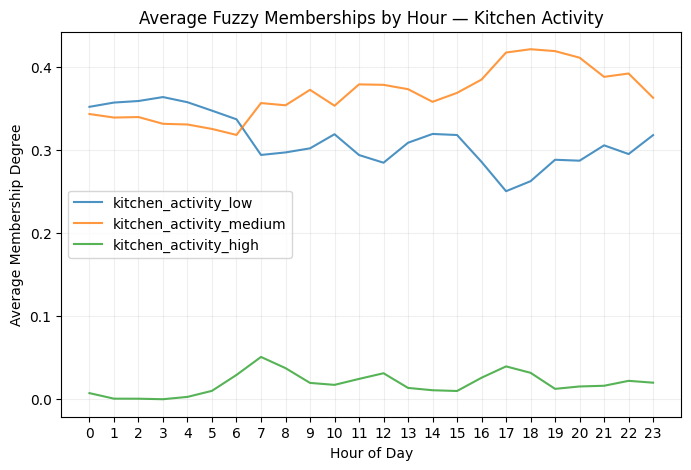

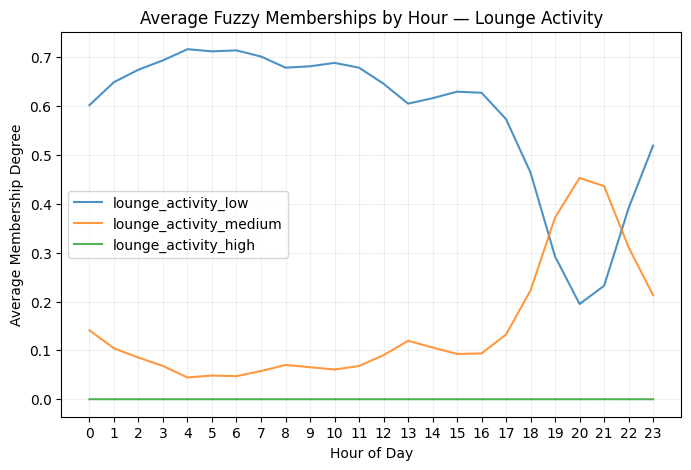

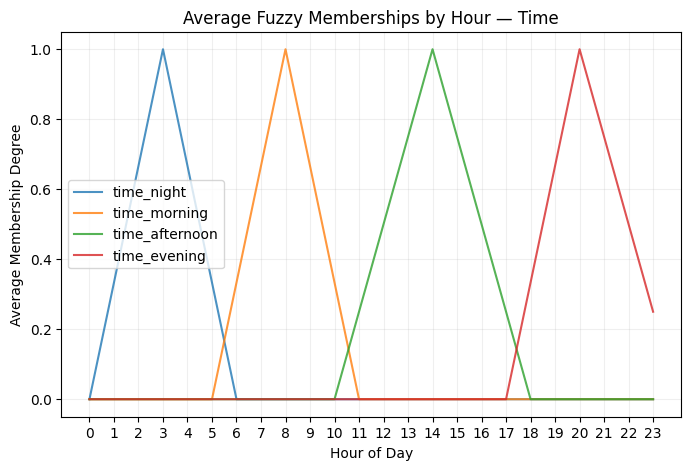

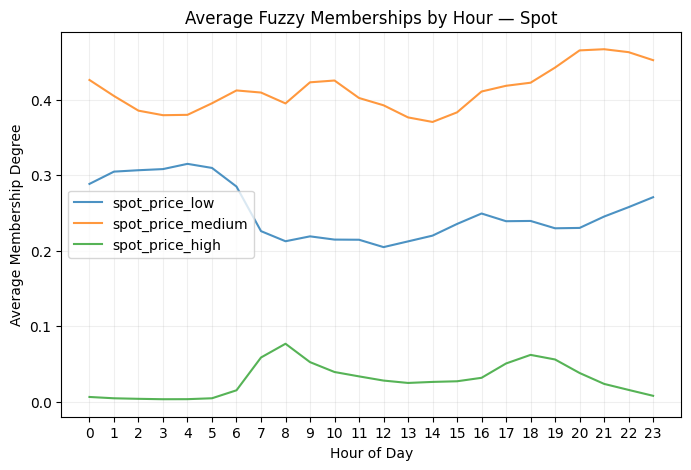

In [18]:
# group by hour to look at daily patterns
fuzzy_by_hour = fuzzy_data.groupby("hour").mean()

# extract relevant columns by membership
fuzzy_by_hour = fuzzy_by_hour.filter(regex="kitchen_|lounge_|spot_price_|time_")

# identify membership groups
# (groups of columns - e.g. 'kitchen_activity_low', 'kitchen_activity_medium' etc.)
fuzzy_groups = {}
for col in fuzzy_by_hour.columns:
    group = "_".join(col.split("_")[:2]) if "time_" not in col and "spot_price_" not in col else col.split("_")[0]
    fuzzy_groups.setdefault(group, []).append(col)

# plot average hourly memberships per category
for group_name, cols in fuzzy_groups.items():
    plt.figure(figsize=(8,5))
    fuzzy_by_hour[cols].plot(ax=plt.gca(), alpha=0.8)
    plt.title(f"Average Fuzzy Memberships by Hour — {group_name.replace('_', ' ').title()}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Membership Degree")
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.2)
    plt.legend()
    plt.show()

# SUS-Defining Fuzzy

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [20]:
print("Lights limits:", lights_limits)
print("Activity limits:", activity_limits)
print("Time of day limits:", time_of_day)
print("Electricity price limits:", electricity_prices)


Lights limits: {'off': (0, 0, 1.5), 'low': (0.5, 5, 20), 'medium': (15, 50, 150), 'high': (120, 300, 550)}
Activity limits: {'low': (0, 0, 20), 'medium': (10, 100, 400), 'high': (300, 1000, 5000)}
Time of day limits: {'night': (0, 3, 6), 'morning': (5, 8, 11), 'afternoon': (10, 14, 18), 'evening': (17, 20, 24)}
Electricity price limits: {'low': (0, 0.3, 0.6), 'medium': (0.3, 0.8, 1.5), 'high': (1.0, 2.5, 5.0)}


In [21]:
# Inputs
kitchen_activity_var = ctrl.Antecedent(np.arange(0, 5001, 1), 'kitchen_activity')
kitchen_lights_var   = ctrl.Antecedent(np.arange(0, 601, 1), 'kitchen_lights')
lounge_activity_var  = ctrl.Antecedent(np.arange(0, 5001, 1), 'lounge_activity')
lounge_lights_var    = ctrl.Antecedent(np.arange(0, 601, 1), 'lounge_lights')
hour_var             = ctrl.Antecedent(np.arange(0, 24.1, 0.1), 'hour')
spot_price_var       = ctrl.Antecedent(np.arange(0, 5.01, 0.01), 'spot_price')

# Outputs
kitchen_light_efficiency = ctrl.Consequent(np.arange(0, 11, 1), 'kitchen_light_efficiency')
lounge_light_efficiency  = ctrl.Consequent(np.arange(0, 11, 1), 'lounge_light_efficiency')
habit_cost               = ctrl.Consequent(np.arange(0, 11, 1), 'habit_cost')
energy_waste             = ctrl.Consequent(np.arange(0, 11, 1), 'energy_waste')


In [22]:
print("kitchen_activity_var universe min/max:", kitchen_activity_var.universe.min(), kitchen_activity_var.universe.max())


kitchen_activity_var universe min/max: 0 5000


In [23]:
# Inputs
for label, (a, b, c) in activity_limits.items():
    kitchen_activity_var[label] = fuzz.trimf(kitchen_activity_var.universe, [a, b, c])
    lounge_activity_var[label]  = fuzz.trimf(lounge_activity_var.universe, [a, b, c])

for label, (a, b, c) in lights_limits.items():
    kitchen_lights_var[label] = fuzz.trimf(kitchen_lights_var.universe, [a, b, c])
    lounge_lights_var[label]  = fuzz.trimf(lounge_lights_var.universe, [a, b, c])

for label, (a, b, c) in time_of_day.items():
    hour_var[label] = fuzz.trimf(hour_var.universe, [a, b, c])

for label, (a, b, c) in electricity_prices.items():
    spot_price_var[label] = fuzz.trimf(spot_price_var.universe, [a, b, c])

# Outputs
kitchen_light_efficiency['very_poor'] = fuzz.trimf(kitchen_light_efficiency.universe, [0, 0, 5])
kitchen_light_efficiency['poor']      = fuzz.trimf(kitchen_light_efficiency.universe, [0, 2, 5])
kitchen_light_efficiency['good']      = fuzz.trimf(kitchen_light_efficiency.universe, [5, 7, 10])
kitchen_light_efficiency['very_good'] = fuzz.trimf(kitchen_light_efficiency.universe, [7, 10, 10])

lounge_light_efficiency['very_poor'] = fuzz.trimf(lounge_light_efficiency.universe, [0, 0, 5])
lounge_light_efficiency['poor']      = fuzz.trimf(lounge_light_efficiency.universe, [0, 2, 5])
lounge_light_efficiency['good']      = fuzz.trimf(lounge_light_efficiency.universe, [5, 7, 10])
lounge_light_efficiency['very_good'] = fuzz.trimf(lounge_light_efficiency.universe, [7, 10, 10])

habit_cost['low']    = fuzz.trimf(habit_cost.universe, [0, 2, 5])
habit_cost['medium'] = fuzz.trimf(habit_cost.universe, [3, 5, 7])
habit_cost['high']   = fuzz.trimf(habit_cost.universe, [5, 7, 10])

energy_waste['low']    = fuzz.trimf(energy_waste.universe, [0, 2, 5])
energy_waste['medium'] = fuzz.trimf(energy_waste.universe, [3, 5, 7])
energy_waste['high']   = fuzz.trimf(energy_waste.universe, [5, 7, 10])


In [24]:
print("Membership functions for kitchen_activity:", kitchen_activity_var.terms.keys())
print("Membership functions for kitchen_lights:", kitchen_lights_var.terms.keys())
print("Membership functions for hour:", hour_var.terms.keys())

Membership functions for kitchen_activity: odict_keys(['low', 'medium', 'high'])
Membership functions for kitchen_lights: odict_keys(['off', 'low', 'medium', 'high'])
Membership functions for hour: odict_keys(['night', 'morning', 'afternoon', 'evening'])


In [25]:
rules = [
    # Habit Cost
    ctrl.Rule(kitchen_activity_var['high'] & kitchen_lights_var['high'], habit_cost['high']),
    ctrl.Rule(kitchen_activity_var['medium'] & kitchen_lights_var['medium'], habit_cost['medium']),
    ctrl.Rule(kitchen_activity_var['low'] & kitchen_lights_var['low'], habit_cost['low']),
    ctrl.Rule(spot_price_var['high'], habit_cost['high']),
    ctrl.Rule(spot_price_var['medium'], habit_cost['medium']),
    ctrl.Rule(spot_price_var['low'], habit_cost['low']),
    
    # Energy Waste
    ctrl.Rule(lounge_activity_var['high'] & lounge_lights_var['high'], energy_waste['high']),
    ctrl.Rule(lounge_activity_var['medium'] & lounge_lights_var['medium'], energy_waste['medium']),
    ctrl.Rule(lounge_activity_var['low'] & lounge_lights_var['low'], energy_waste['low']),
    ctrl.Rule(kitchen_activity_var['high'] & kitchen_lights_var['high'], energy_waste['high']),
    ctrl.Rule(hour_var['night'] & lounge_lights_var['off'], energy_waste['low']),
    ctrl.Rule(hour_var['evening'] & lounge_lights_var['high'], energy_waste['high']),
    
    # Kitchen Light Efficiency
    ctrl.Rule(kitchen_lights_var['low'] & kitchen_activity_var['high'], kitchen_light_efficiency['good']),
    ctrl.Rule(kitchen_lights_var['medium'] & kitchen_activity_var['medium'], kitchen_light_efficiency['good']),
    ctrl.Rule(kitchen_lights_var['high'] & kitchen_activity_var['low'], kitchen_light_efficiency['very_poor']),
    ctrl.Rule(hour_var['morning'] & kitchen_activity_var['medium'], kitchen_light_efficiency['good']),
    ctrl.Rule(hour_var['afternoon'] & kitchen_lights_var['medium'], kitchen_light_efficiency['good']),
    
    # Lounge Light Efficiency
    ctrl.Rule(lounge_lights_var['low'] & lounge_activity_var['high'], lounge_light_efficiency['good']),
    ctrl.Rule(lounge_lights_var['medium'] & lounge_activity_var['medium'], lounge_light_efficiency['good']),
    ctrl.Rule(lounge_lights_var['high'] & lounge_activity_var['low'], lounge_light_efficiency['very_poor']),
    ctrl.Rule(lounge_lights_var['off'], lounge_light_efficiency['very_poor']),
    ctrl.Rule(hour_var['evening'] & lounge_lights_var['medium'], lounge_light_efficiency['good'])
]

In [26]:
for r in rules:
    print(r)


IF kitchen_activity[high] AND kitchen_lights[high] THEN habit_cost[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF kitchen_activity[medium] AND kitchen_lights[medium] THEN habit_cost[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF kitchen_activity[low] AND kitchen_lights[low] THEN habit_cost[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF spot_price[high] THEN habit_cost[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF spot_price[medium] THEN habit_cost[medium]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF spot_price[low] THEN habit_cost[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF lounge_activity[high] AND lounge_lights[high] THEN energy_waste[high]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF lounge_activity[medium] AND lounge_lights[medium] THEN energy_waste[medium]
	AND aggregation function : fmin
	OR

In [27]:
fuzzy_system = ctrl.ControlSystem(rules)
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_system)

In [28]:
fuzzy_sim.input['kitchen_activity'] = 300   # medium/high
fuzzy_sim.input['kitchen_lights']   = 100   # medium
fuzzy_sim.input['lounge_activity']  = 300   # medium
fuzzy_sim.input['lounge_lights']    = 50    # low
fuzzy_sim.input['hour']             = 10    # morning
fuzzy_sim.input['spot_price']       = 1.0   # medium/high

# Compute fuzzy outputs
fuzzy_sim.compute()

In [29]:
outputs = fuzzy_sim.output

print("Kitchen Light Efficiency:", outputs.get('kitchen_light_efficiency', np.nan))
print("Lounge Light Efficiency:", outputs.get('lounge_light_efficiency', np.nan))
print("Habit Cost:", outputs.get('habit_cost', np.nan))
print("Energy Waste Score:", outputs.get('energy_waste', np.nan))

Kitchen Light Efficiency: 7.422222222222222
Lounge Light Efficiency: 7.422222222222222
Habit Cost: 5.000000000000001
Energy Waste Score: 5.0


**Result Analysi**


1. Efficiency

- Kitchen and lounge light efficiency are both good and the system interprets that light usage is reasonable comparing to the activity.

- Lounge lights are low while activity is medium → efficiency could arguably be slightly higher, but rules likely average it to “good.”

2. Cost

- Habit cost is medium because spot price is 1.0 (medium/high), and activity levels are moderate.

- Shows the fuzzy system is weighting spot price + activity + lights correctly.

3. Energy Waste

- Medium waste reflects:

    - Lounge lights slightly underused for activity → some wasted potential efficiency.

    - Kitchen lights reasonable → no extreme waste.

4. General behavior

- System behaves sensibly:

    - Higher activity or lights would increase habit cost and waste.

    - Lower activity/lights would decrease cost and waste.

    - Efficiency depends on matching lights to activity, which is captured well.


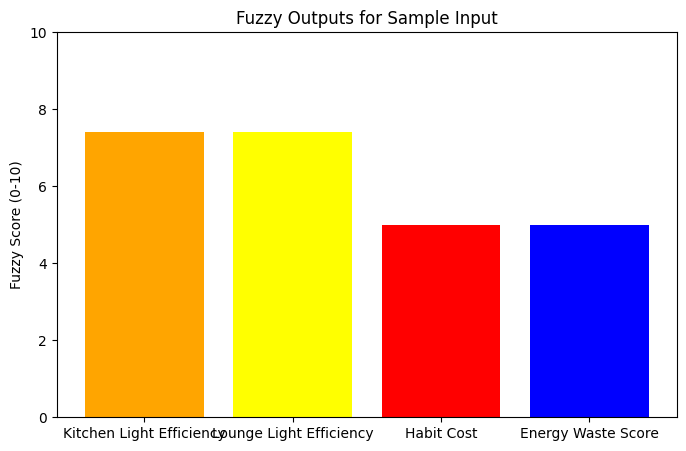

In [30]:
outputs = fuzzy_sim.output
labels = ['Kitchen Light Efficiency', 'Lounge Light Efficiency', 'Habit Cost', 'Energy Waste Score']
values = [outputs.get('kitchen_light_efficiency', np.nan),
          outputs.get('lounge_light_efficiency', np.nan),
          outputs.get('habit_cost', np.nan),
          outputs.get('energy_waste', np.nan)]

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=['orange','yellow','red','blue'])
plt.ylim(0, 10)
plt.ylabel('Fuzzy Score (0-10)')
plt.title('Fuzzy Outputs for Sample Input')
plt.show()

Kitchen Light Efficiency Membership Function:
Lounge Light Efficiency Membership Function:
Habit Cost Membership Function:
Energy Waste Score Membership Function:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


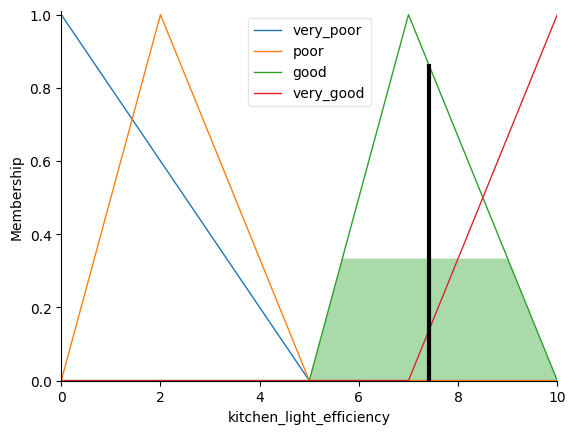

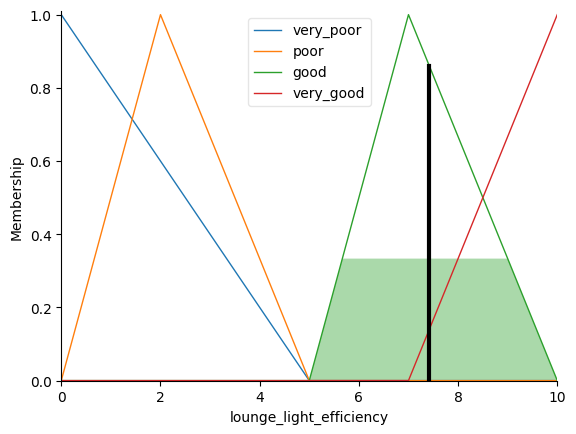

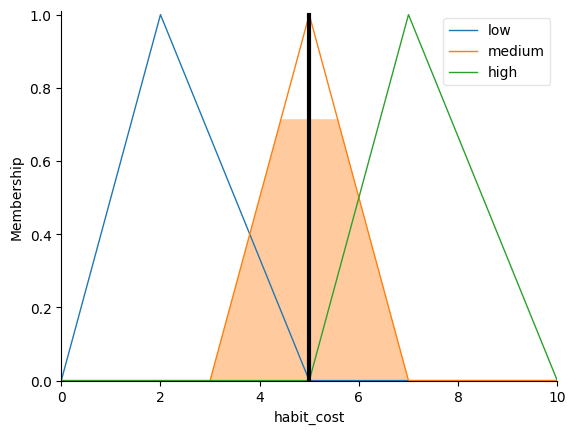

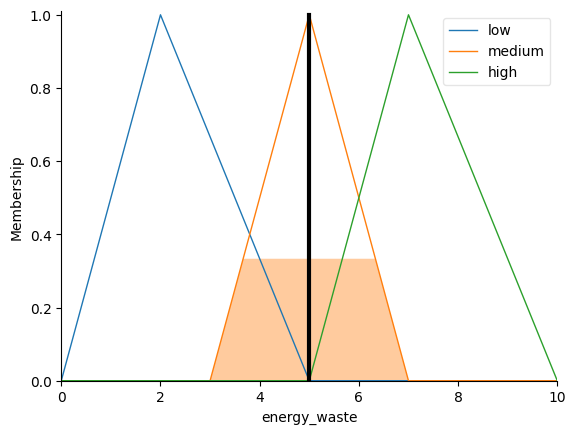

In [31]:
# Kitchen Light Efficiency
print("Kitchen Light Efficiency Membership Function:")
kitchen_light_efficiency.view(sim=fuzzy_sim)

# Lounge Light Efficiency
print("Lounge Light Efficiency Membership Function:")
lounge_light_efficiency.view(sim=fuzzy_sim)

# Habit Cost
print("Habit Cost Membership Function:")
habit_cost.view(sim=fuzzy_sim)

# Energy Waste
print("Energy Waste Score Membership Function:")
energy_waste.view(sim=fuzzy_sim)

In [32]:
def classify_demand(value):
    if value <= 3:
        return "Low"
    elif value <= 7:
        return "Medium"
    else:
        return "High"

# Apply to all outputs
demand_levels = {name: classify_demand(val) for name, val in fuzzy_sim.output.items()}

for output_name, level in demand_levels.items():
    print(f"{output_name}: {level}")

habit_cost: Medium
energy_waste: Medium
kitchen_light_efficiency: High
lounge_light_efficiency: High


In [33]:
results = []

for i in range(500): 
    row = data.iloc[i]
    
    fuzzy_sim.input['kitchen_activity'] = row['kitchen_activity']
    fuzzy_sim.input['kitchen_lights']   = row['kitchen_lights']
    fuzzy_sim.input['lounge_activity']  = row['lounge_activity']
    fuzzy_sim.input['lounge_lights']    = row['lounge_lights']
    fuzzy_sim.input['hour']             = row['hour']
    fuzzy_sim.input['spot_price']       = row['spot_price']
    
    fuzzy_sim.compute()
    
    kitchen_eff = fuzzy_sim.output.get('kitchen_light_efficiency', np.nan)
    lounge_eff  = fuzzy_sim.output.get('lounge_light_efficiency', np.nan)
    habit_cost  = fuzzy_sim.output.get('habit_cost', np.nan)
    energy_waste = fuzzy_sim.output.get('energy_waste', np.nan)
    
    # Classify into Low / Medium / High
    results.append({
        'hour': row['hour'],
        'kitchen_light_efficiency': classify_demand(kitchen_eff),
        'lounge_light_efficiency': classify_demand(lounge_eff),
        'habit_cost': classify_demand(habit_cost),
        'energy_waste': classify_demand(energy_waste)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,hour,kitchen_light_efficiency,lounge_light_efficiency,habit_cost,energy_waste
0,0.0,High,Low,Medium,High
1,0.0,High,Low,Medium,High
2,0.0,High,Low,Medium,High
3,0.0,High,Low,Medium,High
4,0.0,High,Low,Medium,High
...,...,...,...,...,...
495,8.0,High,Low,Low,High
496,8.0,High,Low,Low,High
497,8.0,High,Low,Low,High
498,8.0,High,Low,Low,High


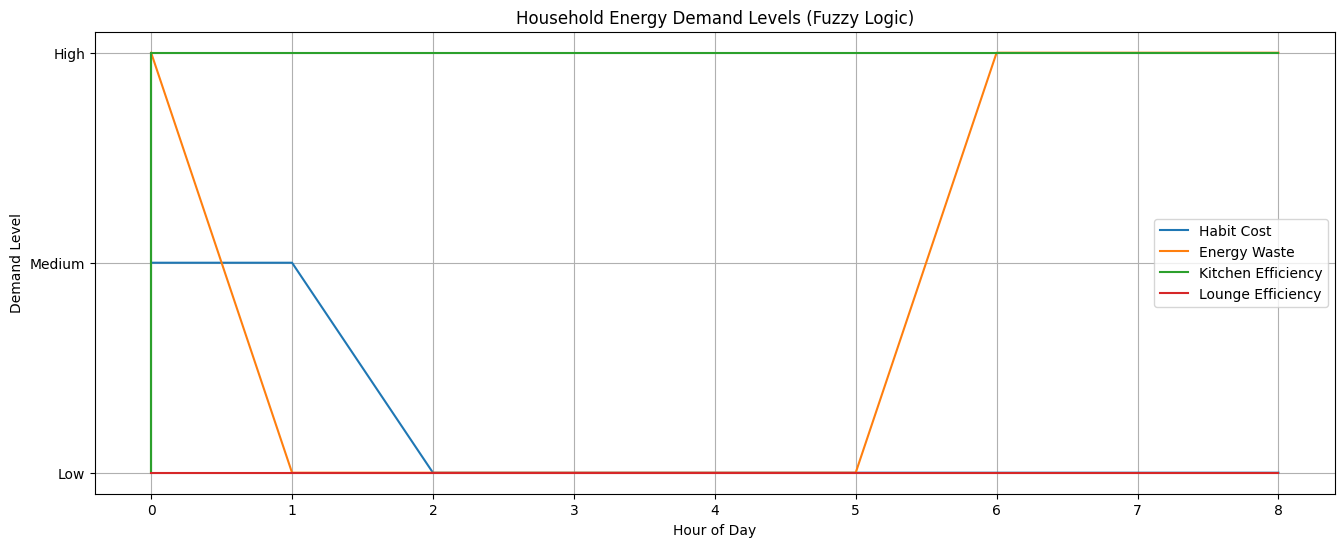

In [34]:
category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
results_plot = results_df.replace(category_to_num)

plt.figure(figsize=(16,6))
plt.plot(results_df['hour'], results_plot['habit_cost'], label='Habit Cost')
plt.plot(results_df['hour'], results_plot['energy_waste'], label='Energy Waste')
plt.plot(results_df['hour'], results_plot['kitchen_light_efficiency'], label='Kitchen Efficiency')
plt.plot(results_df['hour'], results_plot['lounge_light_efficiency'], label='Lounge Efficiency')
plt.yticks([0,1,2], ['Low','Medium','High'])
plt.xlabel('Hour of Day')
plt.ylabel('Demand Level')
plt.title('Household Energy Demand Levels (Fuzzy Logic)')
plt.legend()
plt.grid(True)
plt.show()


**Result analysis** 

**1.** Kitchen Light Efficiency: Is consistently high (1.6–2.0) during early morning hours (midnight → 8 AM).

- Even with low activity in the kitchen at night/morning, the system is classifying kitchen lighting as high demand, maybe because of rules linking early hours or medium activity to efficiency, which might indicate that the lights are on unnecessarily or energy is being wasted.

**2.** Lounge Light Efficiency:  Lounge lights are low demand from midnight to 8 AM. 
- Kind of expected, as the lounge is likely unused during these hours. 

**3.** Habit cost: - Habit cost starts at low/medium very early (0–1 AM) and then drops to low. 

- Suggesting that the electricity cost impact is low during early mornings, most likely because both activity and spot prices are low, and lighting is limited.

**4.** Energy Waste: High energy waste at midnight (0) and in the morning (6–8 AM). Very low waste between 1–5 AM. 

- Midnight high waste could indicate that the lights or appliances are left on unnecessarily. While the morning spike (6–8 AM) could be linked to kitchen activity starting for breakfast or automated devices turning on and the low waste 1–5 AM aligns perfectly with household inactivity.


In [35]:
category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
results_numeric = results_df.replace(category_to_num)

hourly_numeric = results_numeric.groupby('hour').mean()

hourly_numeric = hourly_numeric.round(2)

# Display the numeric table
print(hourly_numeric)

      kitchen_light_efficiency  lounge_light_efficiency  habit_cost  \
hour                                                                  
0.0                        1.6                      0.0         1.0   
1.0                        2.0                      0.0         1.0   
2.0                        2.0                      0.0         0.0   
3.0                        2.0                      0.0         0.0   
4.0                        2.0                      0.0         0.0   
5.0                        2.0                      0.0         0.0   
6.0                        2.0                      0.0         0.0   
7.0                        2.0                      0.0         0.0   
8.0                        2.0                      0.0         0.0   

      energy_waste  
hour                
0.0            2.0  
1.0            0.0  
2.0            0.0  
3.0            0.0  
4.0            0.0  
5.0            0.0  
6.0            2.0  
7.0            2.0  
8.0     

In [36]:
category_to_num = {'Low': 0, 'Medium': 1, 'High': 2}
results_numeric = results_df.replace(category_to_num)

hourly_summary = results_numeric.groupby('hour').mean().round(2)

num_to_category = {0: 'Low', 1: 'Medium', 2: 'High'}
hourly_summary_categorized = hourly_summary.applymap(lambda x: num_to_category[round(x)])

print("Hourly Numeric Averages (0=Low,1=Medium,2=High):")
print(hourly_summary)
print("\nHourly Categorized Levels (Low/Medium/High):")
print(hourly_summary_categorized)


Hourly Numeric Averages (0=Low,1=Medium,2=High):
      kitchen_light_efficiency  lounge_light_efficiency  habit_cost  \
hour                                                                  
0.0                        1.6                      0.0         1.0   
1.0                        2.0                      0.0         1.0   
2.0                        2.0                      0.0         0.0   
3.0                        2.0                      0.0         0.0   
4.0                        2.0                      0.0         0.0   
5.0                        2.0                      0.0         0.0   
6.0                        2.0                      0.0         0.0   
7.0                        2.0                      0.0         0.0   
8.0                        2.0                      0.0         0.0   

      energy_waste  
hour                
0.0            2.0  
1.0            0.0  
2.0            0.0  
3.0            0.0  
4.0            0.0  
5.0            0.0  
6

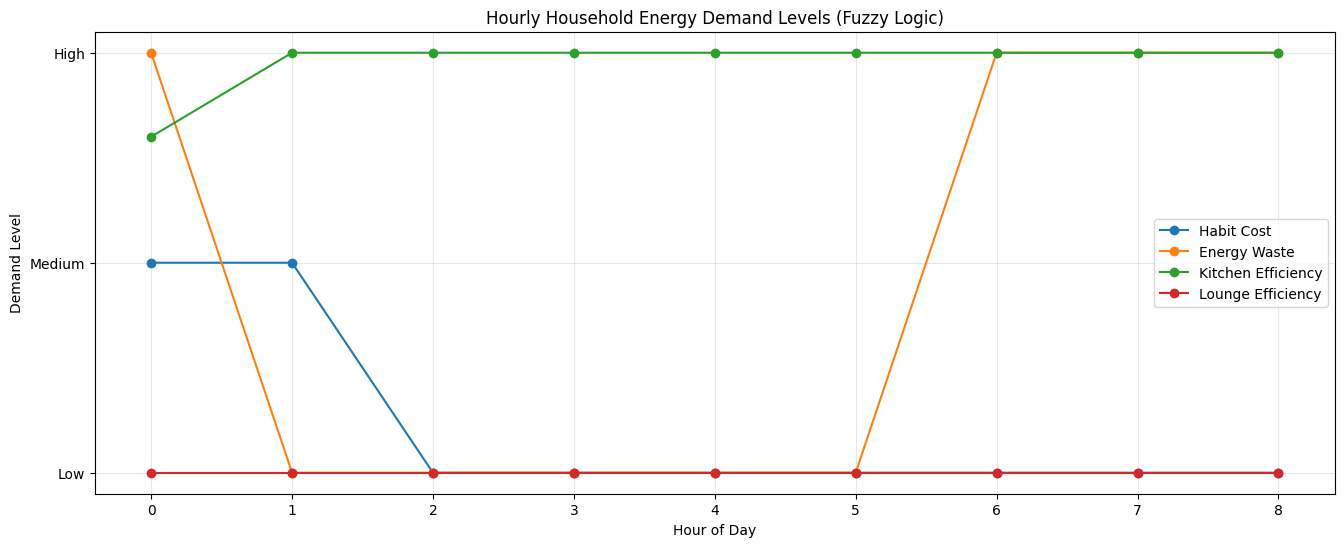

In [37]:
hourly_numeric = results_numeric.groupby('hour').mean().round(2)

plt.figure(figsize=(16,6))

# Plot each category
plt.plot(hourly_numeric.index, hourly_numeric['habit_cost'], label='Habit Cost', marker='o')
plt.plot(hourly_numeric.index, hourly_numeric['energy_waste'], label='Energy Waste', marker='o')
plt.plot(hourly_numeric.index, hourly_numeric['kitchen_light_efficiency'], label='Kitchen Efficiency', marker='o')
plt.plot(hourly_numeric.index, hourly_numeric['lounge_light_efficiency'], label='Lounge Efficiency', marker='o')

# Set y-ticks to show Low / Medium / High
plt.yticks([0,1,2], ['Low','Medium','High'])
plt.xlabel('Hour of Day')
plt.ylabel('Demand Level')
plt.title('Hourly Household Energy Demand Levels (Fuzzy Logic)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


**Result analysis** 

**1.Kitchen Light Efficiency**

- Values: 1.6 → 2.0 (High) for all hours 0–8 AM
- Categorical: Always High.

The kitchen is using lights or appliances consistently at high intensity, even at night/early morning which might indicate that the lights or appliances are on unnecessarily in low-activity periods, which is a target for energy optimisation.

**2. Lounge Light Efficiency**

- Values: 0.0 (Low) for all hours 0–8 AM
- Categorical: Always Low

Lounge is mostly idle during these hours. Energy efficiency is naturally low because the space is unused. No need for changes here. 

**3. Habit Cost**

- Values: 0–1 → Low to Medium
- Categorical: 0.0 → Low (2–5 AM) & 1.0 → Medium (0–1 AM)

Electricity costs are low in the early morning, even though kitchen lights are high.
The medium value at midnight/1 AM could reflect high-demand appliances or a spike in activity but overall, the habit cost is not critical at this time period. 

**4. Energy Waste**

- Values: 0 → 2
- Categorical: High at 0 AM, 6–8 AM & Low at 1–5 AM

- Peak energy waste occurs at midnight (0 AM) — lights/appliances left on unnecessarily.
- Another peak occurs in the morning (6–8 AM), likely due to kitchen activity starting for breakfast.
- Very low waste from 1–5 AM aligns with household inactivity, so efficiency is good.

**5. Patterns & Insights**

 1- Kitchen dominates early usage:

 - High light efficiency and energy waste, even with low habit cost.

 - Could optimize by automatic dimming/off or scheduling appliances later.

    2. Lounge is inactive at night:

        - No major energy waste. Good.

    3. Habit cost is generally low:
    
        - Energy use is concentrated during low-cost hours, which is positive.

    4. Energy waste spikes at transition times:

        - Midnight: possible lights/appliances left on

        - Morning 6–8 AM: start of kitchen activity (e.g., breakfast preparation)

**6. Recommendations**

1. Automate kitchen lighting/appliances at night to reduce unnecessary energy use.

2. Consider shifting some morning appliance usage slightly later if peak spot prices or demand constraints apply.

3. Monitor energy waste patterns beyond 8 AM to see if peaks continue during the day.



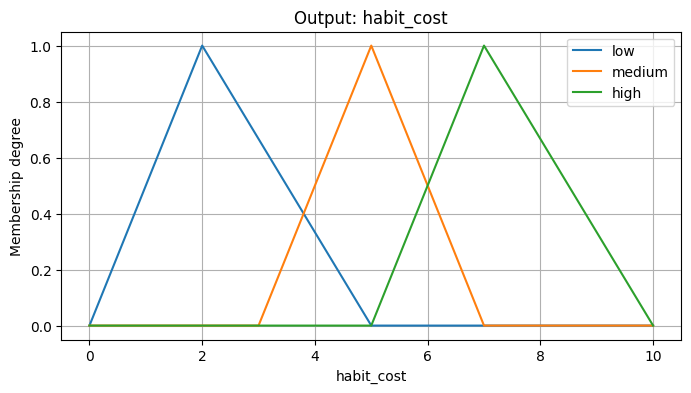

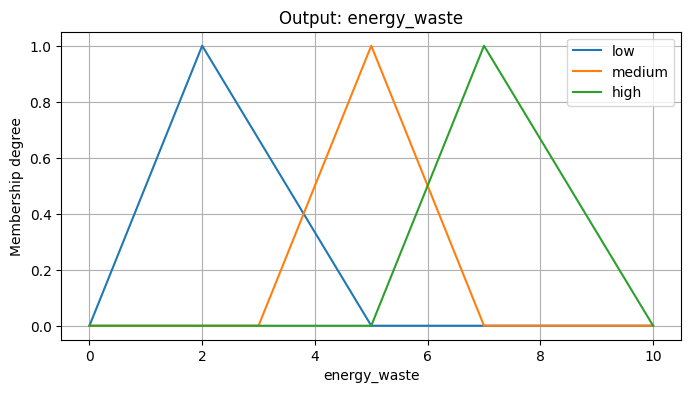

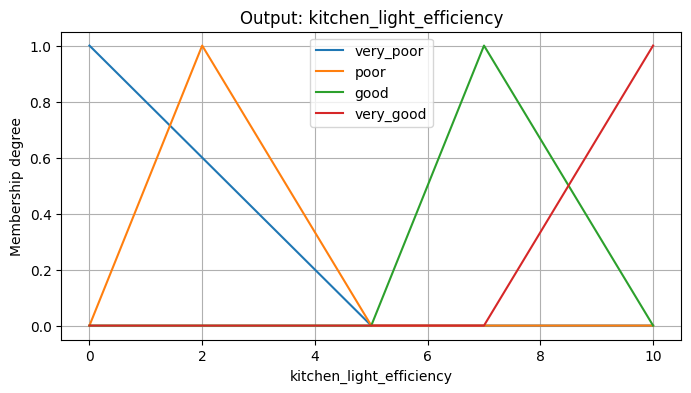

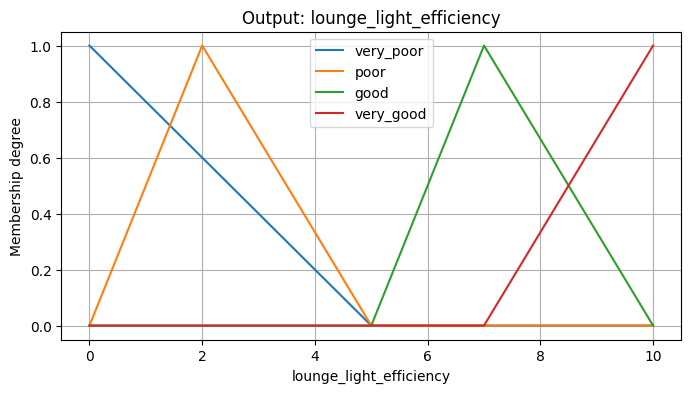

In [46]:
# Plot membership functions for outputs
for var in fuzzy_system.consequents:
    plt.figure(figsize=(8, 4))
    for label, mf in var.terms.items():
        y = mf.mf if hasattr(mf, 'mf') else mf 
        if len(y) == len(var.universe):
            plt.plot(var.universe, y, label=label)
    plt.title(f"Output: {var.label}")
    plt.xlabel(var.label)
    plt.ylabel("Membership degree")
    plt.legend()
    plt.grid(True)
    plt.show()


In [47]:
# Storage for outputs (binary)
outputs_bin = pd.DataFrame(index=data.index[:500], columns=[
    'kitchen_light_efficiency', 'lounge_light_efficiency', 'habit_cost', 'energy_waste'
])

# Run fuzzy inference for first 500 rows
for i, row in data.iloc[:500].iterrows():
    fuzzy_sim.input['kitchen_activity'] = row['kitchen_activity']
    fuzzy_sim.input['kitchen_lights']   = row['kitchen_lights']
    fuzzy_sim.input['lounge_activity']  = row['lounge_activity']
    fuzzy_sim.input['lounge_lights']    = row['lounge_lights']
    fuzzy_sim.input['hour']             = row['hour']
    fuzzy_sim.input['spot_price']       = row['spot_price']

    fuzzy_sim.compute()
    
    for col in outputs_bin.columns:
        val = fuzzy_sim.output.get(col, 0)
        outputs_bin.loc[i, col] = 1 if val > 6.66 else 0 

outputs_bin['hour'] = data['hour'].iloc[:500]

hourly_bin = outputs_bin.groupby('hour').mean()

print("Hourly Binary High-Use Fraction (0-1):")
print(hourly_bin)


Hourly Binary High-Use Fraction (0-1):
      kitchen_light_efficiency  lounge_light_efficiency  habit_cost  \
hour                                                                  
0                     0.016667                      0.0         0.0   
1                     0.000000                      0.0         0.0   
2                     0.000000                      0.0         0.0   
3                     0.000000                      0.0         0.0   
4                     0.000000                      0.0         0.0   
5                     0.000000                      0.0         0.0   
6                     0.183333                      0.0         0.0   
7                     0.516667                      0.0         0.0   
8                     0.300000                      0.0         0.0   

      energy_waste  
hour                
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6          

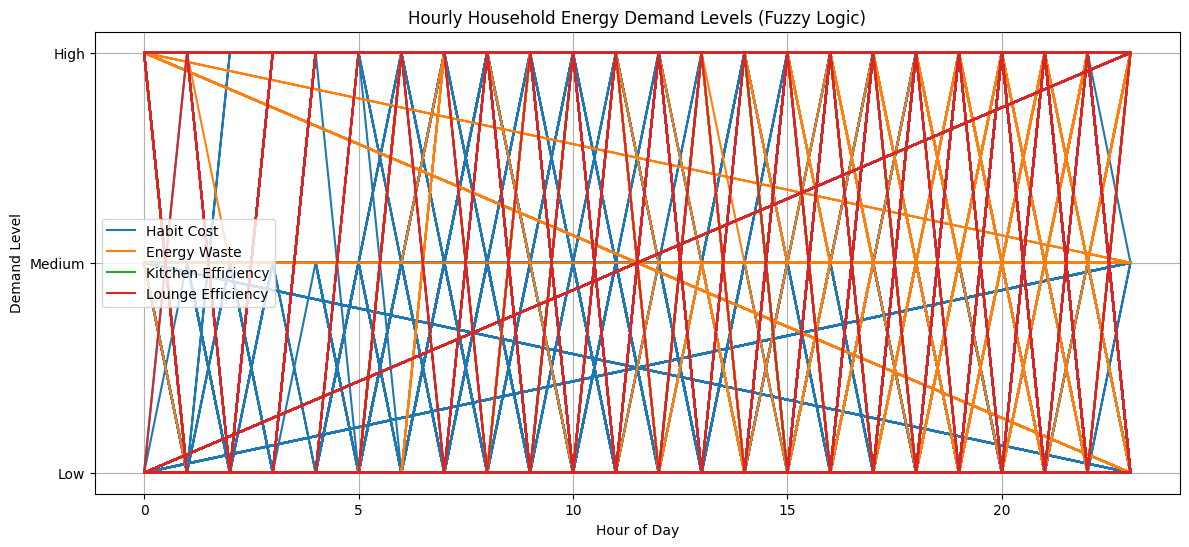

    month  day  hour  kitchen_light_efficiency  lounge_light_efficiency  \
0       1    1     0                         2                        0   
1       1    1     1                         2                        0   
2       1    1     2                         2                        0   
3       1    1     3                         2                        0   
4       1    1     4                         2                        0   
5       1    1     5                         2                        0   
6       1    1     6                         2                        0   
7       1    1     7                         2                        0   
8       1    1     8                         2                        0   
9       1    1     9                         2                        0   
10      1    1    10                         2                        0   
11      1    1    11                         2                        0   
12      1    1    12     

In [48]:
hourly_data = data.groupby(['month','day','hour']).mean()

# Prepare storage
outputs_df = pd.DataFrame(index=hourly_data.index, columns=[
    'kitchen_light_efficiency', 'lounge_light_efficiency', 'habit_cost', 'energy_waste'
])

# Run fuzzy inference for hourly averages
for idx, row in hourly_data.iterrows():
    # idx = (month, day, hour)
    month, day, hour = idx

    fuzzy_sim.input['kitchen_activity'] = row['kitchen_activity']
    fuzzy_sim.input['kitchen_lights']   = row['kitchen_lights']
    fuzzy_sim.input['lounge_activity']  = row['lounge_activity']
    fuzzy_sim.input['lounge_lights']    = row['lounge_lights']
    fuzzy_sim.input['hour']             = hour
    fuzzy_sim.input['spot_price']       = row['spot_price']
    
    fuzzy_sim.compute()
    
  
    outputs_df.loc[idx, 'kitchen_light_efficiency'] = fuzzy_sim.output.get('kitchen_light_efficiency', np.nan)
    outputs_df.loc[idx, 'lounge_light_efficiency']  = fuzzy_sim.output.get('lounge_light_efficiency', np.nan)
    outputs_df.loc[idx, 'habit_cost']               = fuzzy_sim.output.get('habit_cost', np.nan)
    outputs_df.loc[idx, 'energy_waste']            = fuzzy_sim.output.get('energy_waste', np.nan)

def classify_numeric(x):
    if x <= 3:
        return 0  # Low
    elif x <= 7:
        return 1  # Medium
    else:
        return 2  # High

numeric_df = outputs_df.applymap(classify_numeric)

#Plot
plt.figure(figsize=(14,6))
plt.plot([h for _,_,h in numeric_df.index], numeric_df['habit_cost'], label='Habit Cost')
plt.plot([h for _,_,h in numeric_df.index], numeric_df['energy_waste'], label='Energy Waste')
plt.plot([h for _,_,h in numeric_df.index], numeric_df['kitchen_light_efficiency'], label='Kitchen Efficiency')
plt.plot([h for _,_,h in numeric_df.index], numeric_df['lounge_light_efficiency'], label='Lounge Efficiency')
plt.yticks([0,1,2], ['Low','Medium','High'])
plt.xlabel('Hour of Day')
plt.ylabel('Demand Level')
plt.title('Hourly Household Energy Demand Levels (Fuzzy Logic)')
plt.legend()
plt.grid(True)
plt.show()

# Numeric Tabel 
numeric_df.reset_index(inplace=True)
print(numeric_df.head(24))  # Show first 24 hours


**Explanation of code**

This code analyzes the household energy use with fuzzy logic system in a faster and more interpretable way.It works by first aggregating
the household electricity data by hour, which reduces the computational load and shows the general patterns of energy usage throughout the day. For each hour, it applies the fuzzy logic model with inputs like kitchen activity, lounge activity, light usage, time of day, and electricity spot price) to calculate four key outputs:

**Analysis of results**

1. Kitchen Light Efficiency

    - Consistently High (2) throughout the day.

    -  This indicates that kitchen lighting is generally well-matched to activity levels.

    - It suggests that lights are typically turned on only when appliances are in use, reflecting efficient energy behaviour in the kitchen.

2. Lounge Light Efficiency

    - Mostly Low (0).

    - This implies that lounge lights are frequently on when there is little or no activity, resulting in unnecessary energy consumption.

3. Habit Cost

    - Medium during night hours (0–1 AM) and Low in the early morning (2–5 AM).

    - This shows that electricity usage in these periods is either during lower spot prices or associated with low appliance activity, leading to lower costs.

4. Energy Waste

    - High at 0, 6–8, and 9–23 hours; Low between 1–5 AM.

    - High energy waste aligns with periods where lounge lights are on despite minimal activity.

5. Kitchen activity has less impact on energy waste since kitchen light efficiency remains high.

    - Overall Patterns

    - Early hours (0–5 AM): Kitchen lighting is efficient, lounge is largely unused, habit cost is low–medium, energy waste is low.

    - Morning (6–8 AM): Energy waste spikes, likely due to kitchen activity combined with lights being on.

    - Day and evening (9–23): Lounge efficiency remains low and energy waste is high, highlighting a clear opportunity for energy savings.

**Interpretation**

- The fuzzy system effectively identifies mismatches between lighting and activity as energy waste.

- High habit costs occur primarily when electricity prices or appliance usage are elevated.

- The system is highly interpretable: it provides clear insight into which hours are associated with efficient or inefficient energy usage across all metrics.



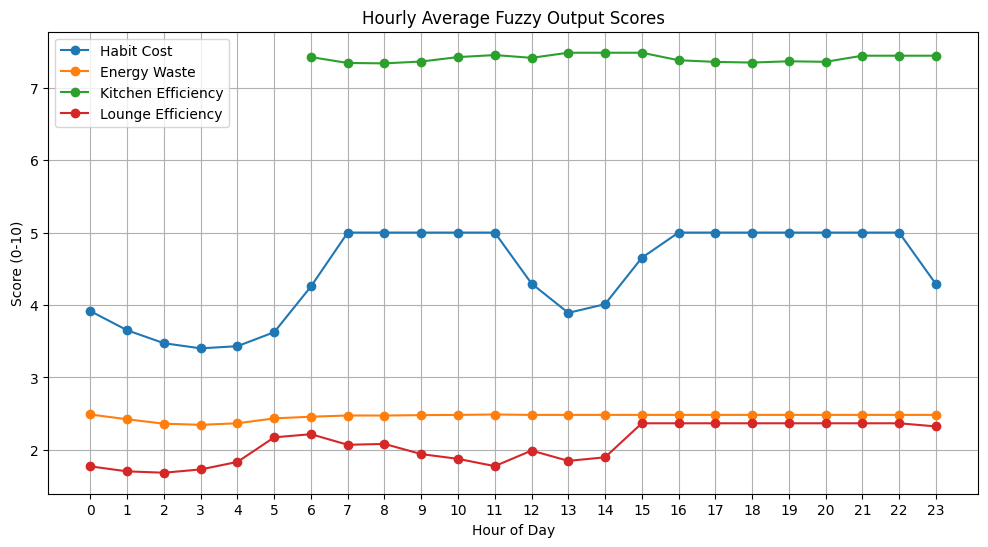

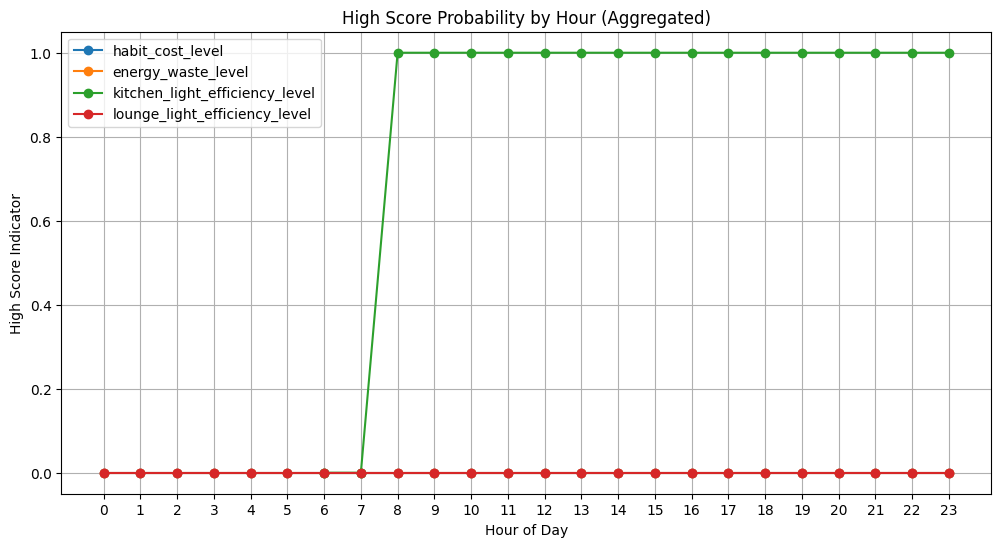

     kitchen_light_efficiency lounge_light_efficiency habit_cost energy_waste  \
hour                                                                            
0                         NaN                1.772064    3.91506     2.488218   
1                         NaN                1.703135    3.65107     2.422222   
2                         NaN                1.684409   3.472355     2.361111   
3                         NaN                1.729907   3.401412     2.345981   
4                         NaN                1.833689   3.431511     2.366738   
5                         NaN                2.172925   3.624966     2.434585   
6                    7.422222                2.216188   4.256081     2.457686   
7                    7.341194                2.070082        5.0     2.474328   
8                    7.335708                2.082038        5.0     2.473868   
9                    7.361111                1.941344        5.0     2.479604   
10                   7.42222

In [45]:

data_hourly = data.groupby('hour').mean()  

outputs_hourly = pd.DataFrame(index=data_hourly.index, columns=[
    'kitchen_light_efficiency', 'lounge_light_efficiency', 'habit_cost', 'energy_waste'
])

for i, row in data_hourly.iterrows():
    fuzzy_sim.input['kitchen_activity'] = row['kitchen_activity']
    fuzzy_sim.input['kitchen_lights']   = row['kitchen_lights']
    fuzzy_sim.input['lounge_activity']  = row['lounge_activity']
    fuzzy_sim.input['lounge_lights']    = row['lounge_lights']
    fuzzy_sim.input['hour']             = row.name  # row.name = hour
    fuzzy_sim.input['spot_price']       = row['spot_price']

    fuzzy_sim.compute()
    
    outputs_hourly.loc[i, 'kitchen_light_efficiency'] = fuzzy_sim.output.get('kitchen_light_efficiency', np.nan)
    outputs_hourly.loc[i, 'lounge_light_efficiency']  = fuzzy_sim.output.get('lounge_light_efficiency', np.nan)
    outputs_hourly.loc[i, 'habit_cost']               = fuzzy_sim.output.get('habit_cost', np.nan)
    outputs_hourly.loc[i, 'energy_waste']            = fuzzy_sim.output.get('energy_waste', np.nan)

thresholds = {'low': 3.33, 'medium': 6.66}

for col in ['habit_cost', 'energy_waste', 'kitchen_light_efficiency', 'lounge_light_efficiency']:
    outputs_hourly[col+'_level'] = pd.cut(
        outputs_hourly[col],
        bins=[-np.inf, thresholds['low'], thresholds['medium'], np.inf],
        labels=['Low','Medium','High']
    )

plt.figure(figsize=(12,6))
plt.plot(outputs_hourly.index, outputs_hourly['habit_cost'], label='Habit Cost', marker='o')
plt.plot(outputs_hourly.index, outputs_hourly['energy_waste'], label='Energy Waste', marker='o')
plt.plot(outputs_hourly.index, outputs_hourly['kitchen_light_efficiency'], label='Kitchen Efficiency', marker='o')
plt.plot(outputs_hourly.index, outputs_hourly['lounge_light_efficiency'], label='Lounge Efficiency', marker='o')
plt.title("Hourly Average Fuzzy Output Scores")
plt.xlabel("Hour of Day")
plt.ylabel("Score (0-10)")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for col in ['habit_cost_level', 'energy_waste_level', 'kitchen_light_efficiency_level', 'lounge_light_efficiency_level']:
    hourly_high_frac = outputs_hourly[col].apply(lambda x: 1 if x=='High' else 0)
    plt.plot(outputs_hourly.index, hourly_high_frac, label=col, marker='o')

plt.xlabel("Hour of Day")
plt.ylabel("High Score Indicator")
plt.title("High Score Probability by Hour (Aggregated)")
plt.xticks(range(0,24))
plt.grid(True)
plt.legend()
plt.show()

print(outputs_hourly)


**Explanation of the code**

This code is a simplified, fast version of the hourly analysis ( the previous one). 
Instead of processing all minutes (which can be slow), it computes average FIS outputs for each hour across all days. The plots and the numeric table show typical daily patterns, highlighting periods of high habit cost, low efficiency, and energy waste, which is exactly what is needed for interpreting and explaining household energy behavior.

**Result analysis**

1. Kitchen Light Efficiency

- Hours 0–5: NaN (likely missing data)

- Hours 6–23: Mostly High (7+), categorised as Medium–High, showing kitchen lights are generally well-matched to activity.

- Interpretation: Kitchen lighting is used efficiently; lights are mostly on only when appliances are active.

2. Lounge Light Efficiency

- All hours: Around 1.7–2.3, categorized as Low.

- Interpretation: Lounge lights are often on even when activity is low. This leads to wasted energy, highlighting a clear opportunity for optimisation.

3. Habit Cost

- Hours 0–5: Medium (around 3.4–3.6), Low in early morning (2–5 AM).

- Hours 6–23: Mostly 4–5, categorized Medium or High.

- Interpretation: Early morning usage occurs during cheaper rates or low activity; costs spike during active hours (morning and evening), showing when electricity consumption is more expensive.

4. Energy Waste

- Hours 0–5: Low (around 2.3–2.4)

- Hours 6–23: Slightly higher (around 2.4–2.48), but still generally moderate.

- Interpretation: Energy waste is driven primarily by lounge lighting being on when activity is low. Kitchen has minimal impact due to efficient usage.

- Overall Observations:

    - Early hours (0–5 AM): Kitchen efficiency is high, lounge unused, habit cost low–medium, energy waste low.

    - Morning (6–8 AM): Energy waste starts to rise (likely due to both kitchen activity and lounge lights).

    - Day/evening (9–23): Habit cost is consistently medium, lounge light efficiency remains low, energy waste stays moderate.

    - Key insight: The fuzzy system correctly identifies mismatched lighting vs. activity and periods of higher cost usage.
